# Minebench v0.1.5 (Python 3.6+)
### PySpark demonstration with Spark 2.0.0+

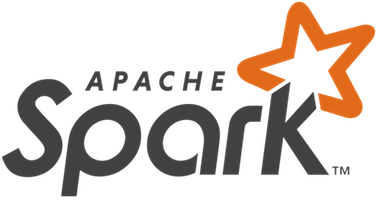

In [11]:
import pyspark
from pyspark.sql import SparkSession


spark = SparkSession.builder.getOrCreate()
    
# Load the CSV as a Spark DataFrame
blocks_df = (spark.read
                  .option("header", "false")
                  .option("mode", "DROPMALFORMED")
                  .csv("100_blocks.csv"))

blocks_df.show()

+---+--------------------+----------+--------------------+
|_c0|                 _c1|       _c2|                 _c3|
+---+--------------------+----------+--------------------+
|  1|00000000000000000...|1231006505|01000000010000000...|
|  1|000000000019d6689...|1231469665|01000000010000000...|
|  1|00000000839a8e688...|1231469744|01000000010000000...|
|  1|000000006a625f066...|1231470173|01000000010000000...|
|  1|0000000082b501558...|1231470988|01000000010000000...|
|  1|000000004ebadb55e...|1231471428|01000000010000000...|
|  1|000000009b7262315...|1231471789|01000000010000000...|
|  1|000000003031a0e73...|1231472369|01000000010000000...|
|  1|0000000071966c2b1...|1231472743|01000000010000000...|
|  1|00000000408c48f84...|1231473279|01000000010000000...|
|  1|000000008d9dc510f...|1231473952|01000000010000000...|
|  1|000000002c05cc2e7...|1231474360|01000000010000000...|
|  1|0000000097be56d60...|1231474888|01000000010000000...|
|  1|0000000027c2488e2...|1231475020|01000000010000000..

In [13]:
from minebench import Minebench, InputUtils, FormatUtils


# Re-mine the blocks
hashes_rdd = blocks_df.rdd.map(lambda row: Minebench.get_block_header(row,
                                                                      bits=0x1FFFFFFF,
                                                                      sequential_nonce=True).mine())

hashes_rdd.collect()

[b'00ac69ed2ee364efafc94b5a5678335e1263a29082b35fb4038d976a0855da5e',
 b'006f306e2568e04c3627eb4fa053477a03f8b07f5a4bf7a0543117189603908a',
 b'00e049b26bbc89af823ad0526a11b05128cb3161da61410f517e55bd47b4b7e3',
 b'000de6cd7bbd47e9d685b658726a1143d11a0b22b18d5190a1611d51cb947fe0',
 b'00fe3c2ed41eadc0c25126879b621efd1b7be9b9aeed38f9d5566c9ae90d66af',
 b'0099488dc33f4dff211de741d2873a305be0ef0fb712a434a459e8695da65643',
 b'006cd03c6a98e731bcb8c666297edb8d5a11fbd24bd5270a660dcf77b5fa6da3',
 b'00407f87818eb4c5b7cad99762f4ee677a1813df0de012528b897032f1b4553f',
 b'00cecfe2db7241bf082a696b58cc3802af52e4bcfc1abf0fae98c0bc53b4e7ed',
 b'00fe9e52ffc623b3395f0766d9e57a14a8e9a633c2982d9282edf928df657d07',
 b'00657c4865de94d3205558b031a7a1e1e89ff4cbf54018aac167088b9778e3bc',
 b'00f300f3277a6bcd81b0ee125cbeeb378273046d48d3b3c74ebf75d1f9dd4ea7',
 b'005973b7a3fcc178e8875e7a5cdb640e081771686c03bb2d094c5e794ceb46d1',
 b'0003302c65b14a2b64ae375bbe3c63c266688f1969a6841892ea96e9ab7d0012',
 b'007b78f8c9fff79b9